In [607]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
import warnings as w
w.filterwarnings('ignore')

In [608]:
df=pd.read_csv("train.csv")
df=pd.DataFrame(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [609]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [610]:
df.shape

(891, 12)

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


In [612]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [613]:
df.any().duplicated()
df.drop_duplicates(inplace=True)
df.shape

(891, 12)

In [614]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [615]:
trans=ColumnTransformer(transformers=
                        [("tf1",SimpleImputer(strategy='mean'),['Age']),
                        ("tf2",OrdinalEncoder(dtype=int),['Sex']) 
                        
                       ])
ag_trn=trans.fit_transform(df)

In [616]:
age=pd.DataFrame(ag_trn,columns=["Age","Sex"])

In [617]:
t_drp=['Age','Sex']
df.drop(t_drp,axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,C148,C


In [618]:
df=pd.concat([df,age],axis=1)

In [619]:
df.isna()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Sex
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [620]:
df['Embarked'].isna().sum()

2

In [621]:
msf=df['Embarked'].mode().iloc(0)
ndf=df['Embarked'].fillna(msf)

In [622]:
le=LabelEncoder()
edf=le.fit_transform(df['Embarked'])
edf=pd.DataFrame(edf,columns=["Embarked"])
edf

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


In [623]:
df.drop('Embarked',axis=1,inplace=True)
df.head()


,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age,Sex
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,22.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,38.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,26.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,35.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,35.0,1.0


In [624]:
df=pd.concat([df,edf],axis=1)
df

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age,Sex,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,22.000000,1.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,38.000000,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,26.000000,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,35.000000,0.0,2
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,35.000000,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,NaN,27.000000,1.0,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,B42,19.000000,0.0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,NaN,29.699118,0.0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,C148,26.000000,1.0,0


In [625]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Age              0
Sex              0
Embarked         0
dtype: int64

In [626]:
df

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age,Sex,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,22.000000,1.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,38.000000,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,26.000000,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,35.000000,0.0,2
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,35.000000,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,NaN,27.000000,1.0,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,B42,19.000000,0.0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,NaN,29.699118,0.0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,C148,26.000000,1.0,0


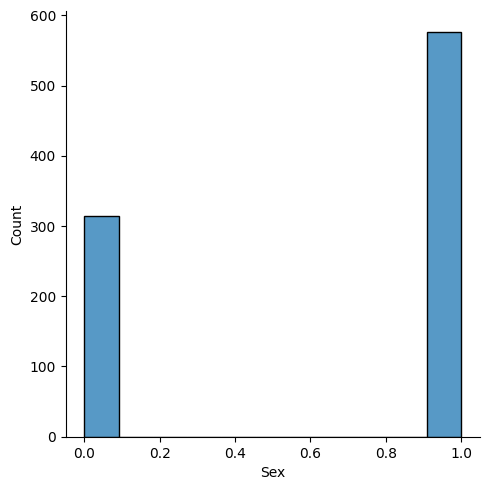

In [627]:
sn.displot(df['Sex'])

<Figure size 1000x1000 with 0 Axes>

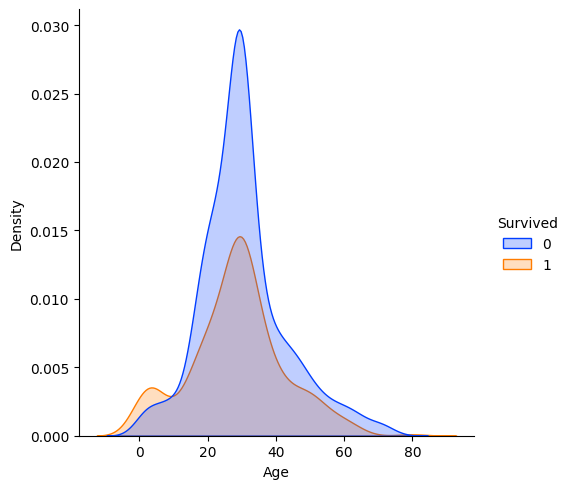

In [628]:
mp.figure(figsize=(10,10))
sn.displot(data=df,x="Age",hue="Survived",kind='kde',palette=sn.color_palette("bright")[:3],fill=True)

In [629]:
# sn.displot(data=df,x="Sex",hue='Survived',kind='kde',fill=True)

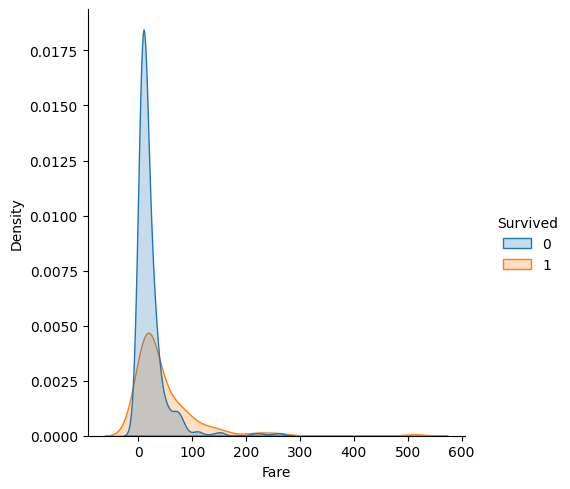

In [630]:
sn.displot(data=df,x="Fare",hue="Survived",kind='kde',fill=True)

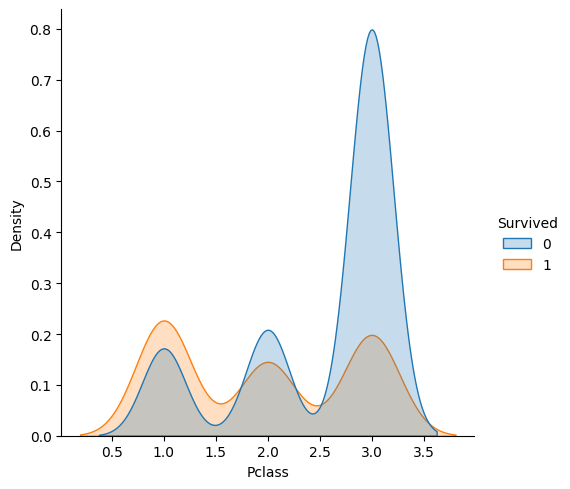

In [631]:
sn.displot(data=df,x="Pclass",hue="Survived",kind='kde',fill=True)

In [632]:
df.head(5)

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age,Sex,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,22.0,1.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,38.0,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,26.0,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,35.0,0.0,2
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,35.0,1.0,2


In [633]:
df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
df

,Survived,Pclass,SibSp,Parch,Fare,Age,Sex,Embarked
0,0,3,1,0,7.2500,22.000000,1.0,2
1,1,1,1,0,71.2833,38.000000,0.0,0
2,1,3,0,0,7.9250,26.000000,0.0,2
3,1,1,1,0,53.1000,35.000000,0.0,2
4,0,3,0,0,8.0500,35.000000,1.0,2
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,1.0,2
887,1,1,0,0,30.0000,19.000000,0.0,2
888,0,3,1,2,23.4500,29.699118,0.0,2
889,1,1,0,0,30.0000,26.000000,1.0,0


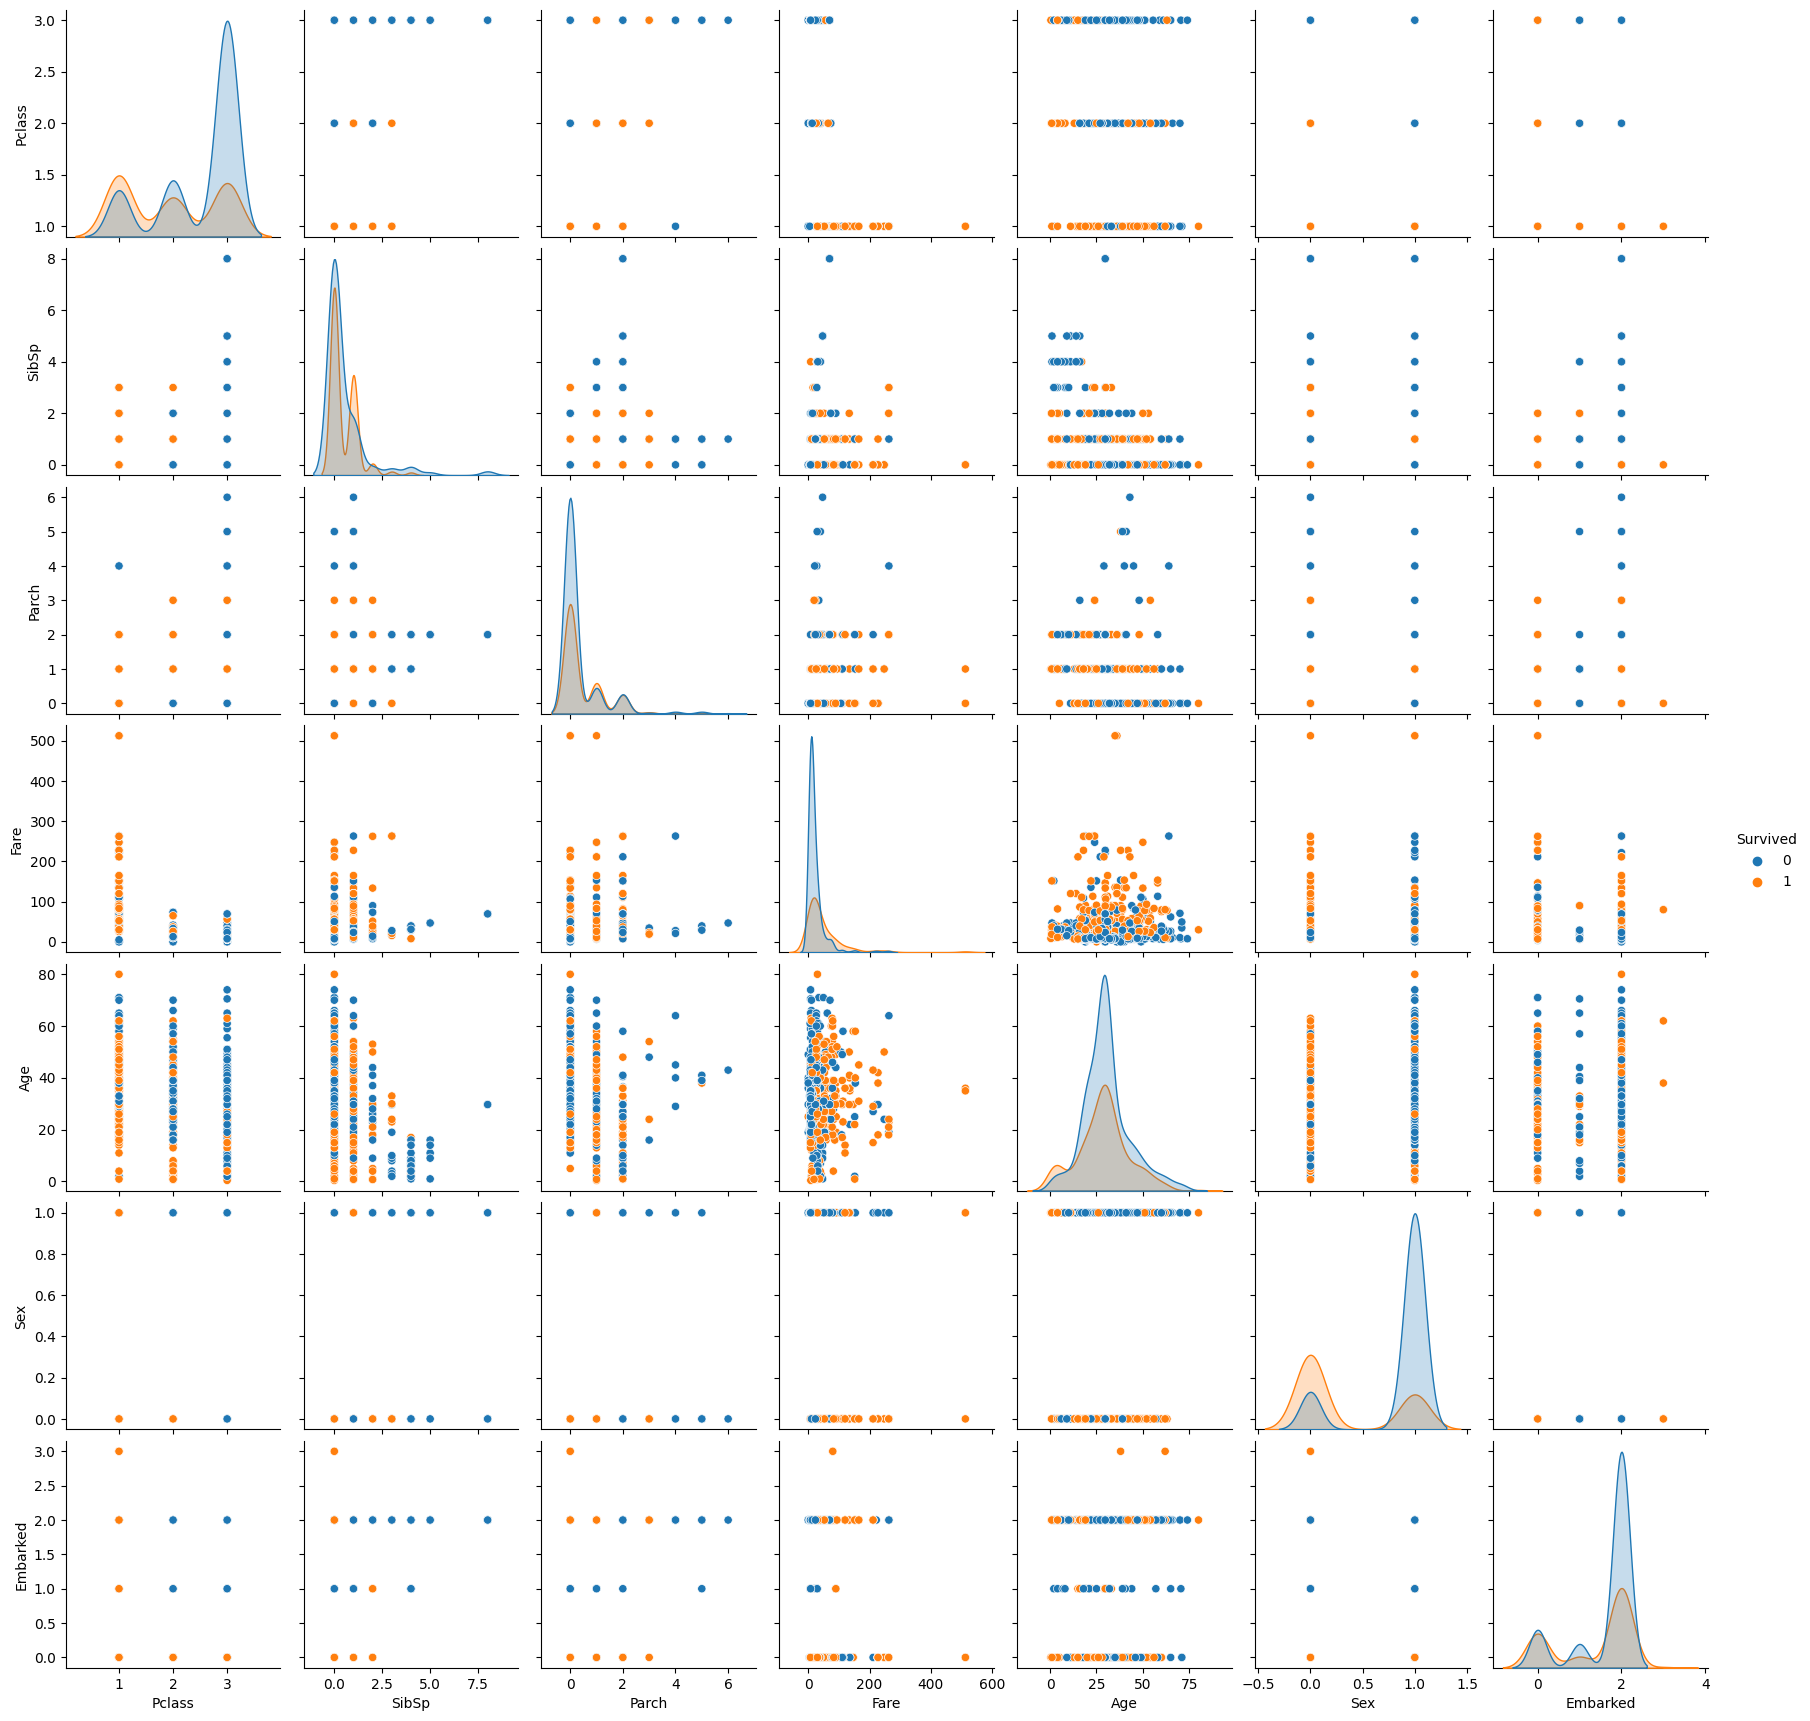

In [634]:
sn.pairplot(df,hue='Survived')

<Axes: >

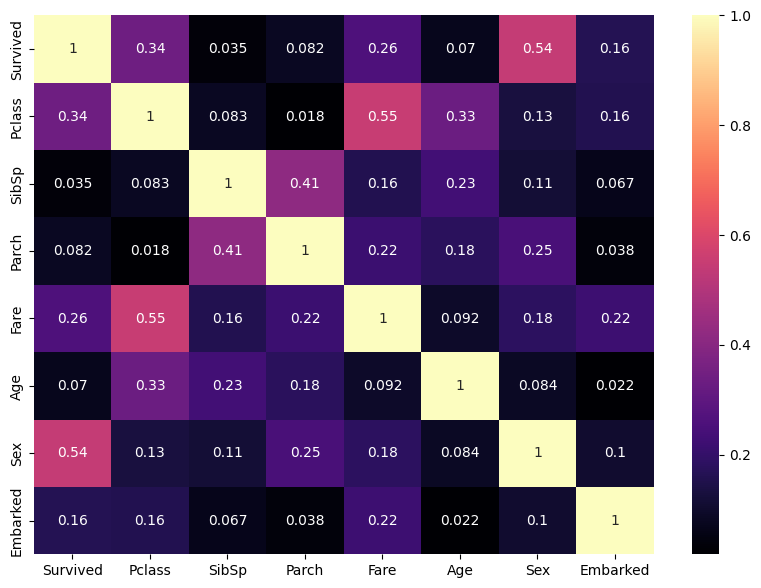

In [635]:
mp.figure(figsize=(10,7))
sn.heatmap(df.corr().abs(),annot=True,cmap="magma")

In [636]:
# ss=StandardScaler()
# sd=ss.fit_transform(df[['Fare']])
# sd=pd.DataFrame(sd,columns=['Fare'])
# sd

In [637]:
# df.drop('Fare',axis=1,inplace=True)

In [638]:
# df=pd.concat([df,sd],axis=1)
# df

In [639]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [640]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [641]:
print(f"The shape of {x_train.shape}")
print(f"The shape of {x_test.shape}")
print(f"The shape of {y_train.shape}")
print(f"The shape of {y_test.shape}")

The shape of (712, 7)

The shape of (179, 7)

The shape of (712,)

The shape of (179,)


In [642]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [643]:
pred=sv.predict(x_test)
print(f"The accuracy score {accuracy_score(y_test,pred)}")


The accuracy score 0.659217877094972


In [644]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [645]:
pred1=lr.predict(x_test)
print(f"the accuracy score {accuracy_score(y_test,pred1)}")

the accuracy score 0.8100558659217877


In [646]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [647]:
predk=kn.predict(x_test)
print(f"the accuracy score {accuracy_score(y_test,predk)}")


the accuracy score 0.7206703910614525


In [648]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [649]:
predd=dt.predict(x_test)
print(f"the accuracy score {accuracy_score(y_test,predd)}")

the accuracy score 0.770949720670391


In [650]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [651]:
predr=rfc.predict(x_test)
print(f"the accuracy score {accuracy_score(y_test,predr)}")

the accuracy score 0.8044692737430168


In [652]:
from sklearn.ensemble import GradientBoostingClassifier
grc=GradientBoostingClassifier()
grc.fit(x_train,y_train)

GradientBoostingClassifier()

In [653]:
predg=grc.predict(x_test)
print(f"the accuracy score {accuracy_score(y_test,predg)}")


the accuracy score 0.8100558659217877


In [654]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [655]:
predx=xg.predict(x_test)
print(f"the accuracy score {accuracy_score(y_test,predx)}")

the accuracy score 0.7932960893854749


In [656]:
score=pd.DataFrame({'MODELS':['SVC','LR','KNN','DC','RFC','GB','XBC'],
                    "ACC":[(accuracy_score(y_test,pred))*100,(accuracy_score(y_test,pred1))*100,(accuracy_score(y_test,predk))*100,(accuracy_score(y_test,predd))*100,(accuracy_score(y_test,predr))*100,(accuracy_score(y_test,predg))*100,(accuracy_score(y_test,predx))*100]})
score

,MODELS,ACC
0,SVC,65.921788
1,LR,81.005587
2,KNN,72.067039
3,DC,77.094972
4,RFC,80.446927
5,GB,81.005587
6,XBC,79.329609


<Axes: xlabel='MODELS', ylabel='ACC'>

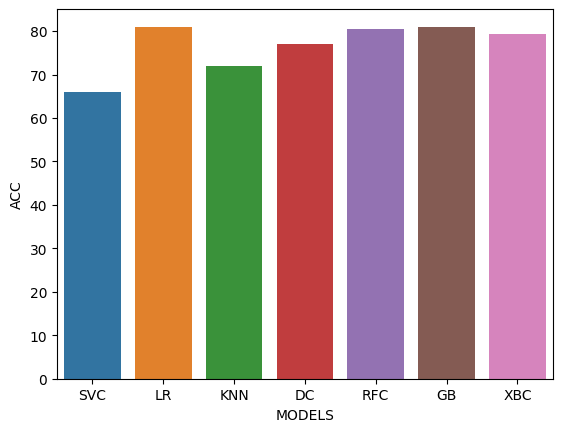

In [657]:
sn.barplot(data=score,x='MODELS',y='ACC')

In [658]:
import joblib as j

In [659]:
j.dump(lr,'titanic_model')

['titanic_model']

In [660]:
mode=j.load('titanic_model')

In [661]:
mod_p=mode.predict([[1,2,3,4,5,6,7]])

In [662]:
if mod_p ==0:
    print("Died")
else:
    print("Alive")    

Died
